In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [116]:
data=pd.read_csv('data_science_job.csv',usecols=['gender','enrolled_university','education_level','major_discipline','experience'])
data.isnull().mean()*100

gender                 23.530640
enrolled_university     2.014824
education_level         2.401086
major_discipline       14.683161
experience              0.339284
dtype: float64

<Axes: xlabel='enrolled_university'>

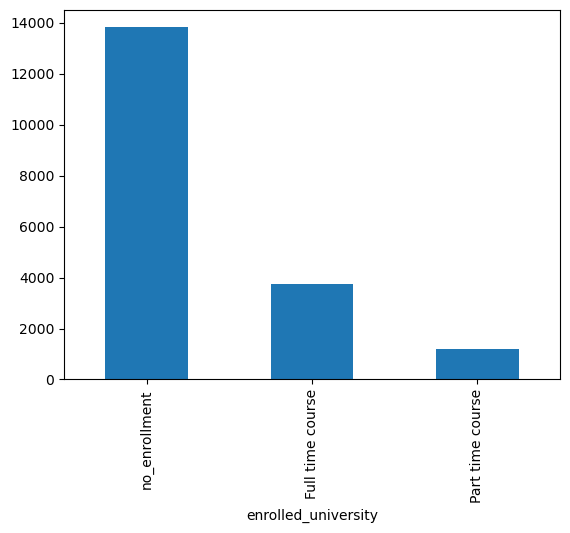

In [117]:
data['enrolled_university'].value_counts().plot(kind='bar')

<Axes: xlabel='education_level'>

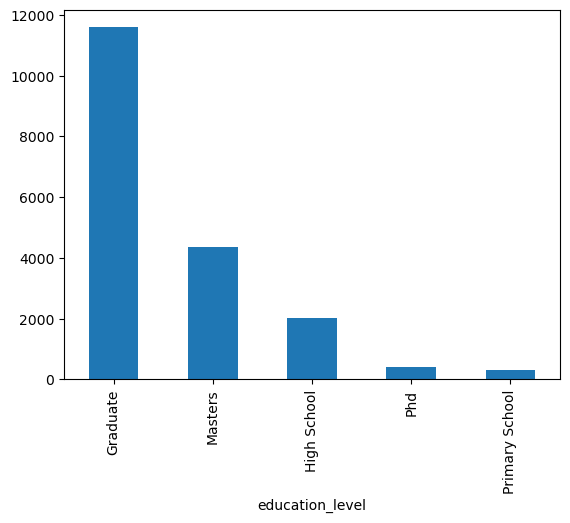

In [118]:
data['education_level'].value_counts().plot(kind='bar')

<Axes: xlabel='major_discipline'>

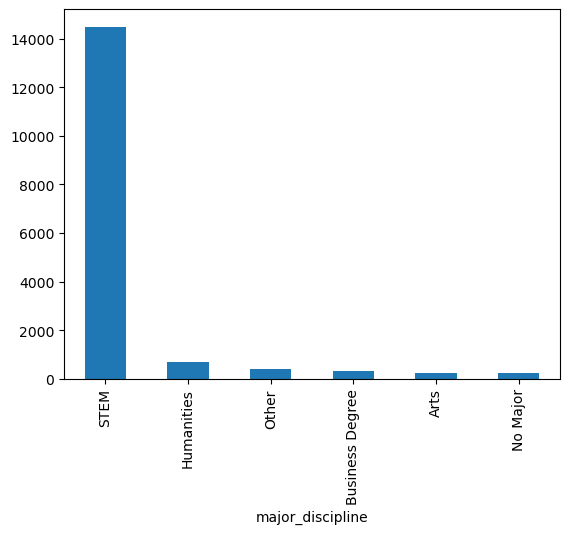

In [119]:
data['major_discipline'].value_counts().plot(kind='bar')

<Axes: xlabel='gender'>

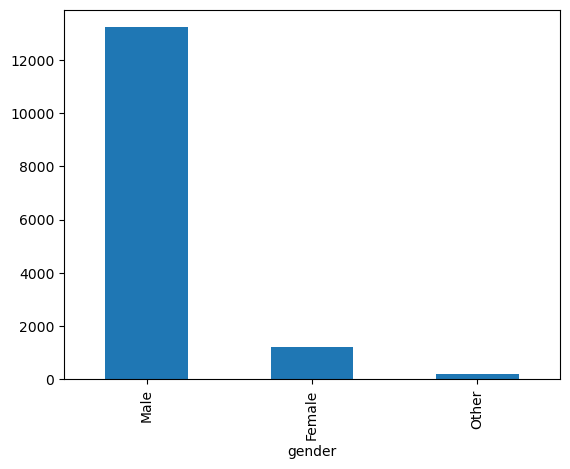

In [138]:
data['gender'].value_counts().plot(kind='bar')

<Axes: ylabel='Density'>

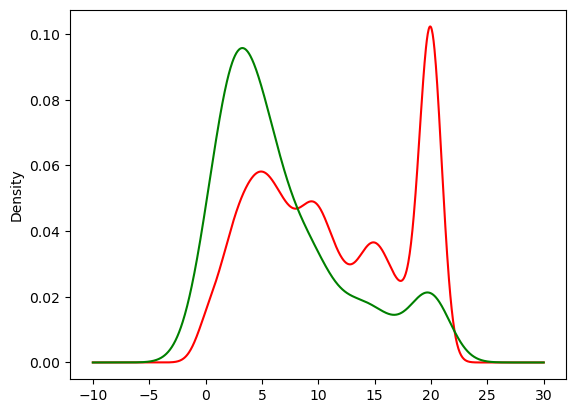

In [124]:
fig=plt.figure()
ax=fig.add_subplot(111)
data[data['enrolled_university']=='no_enrollment']['experience'].plot(kind='kde',color='red')
data[data['enrolled_university'].isnull()]['experience'].plot(kind='kde',color='green')

In [135]:
temp=data[data['enrolled_university']=='no_enrollment']['experience']

In [133]:
data['enrolled_university'].fillna('no_enrollment',inplace=True)

<Axes: ylabel='Density'>

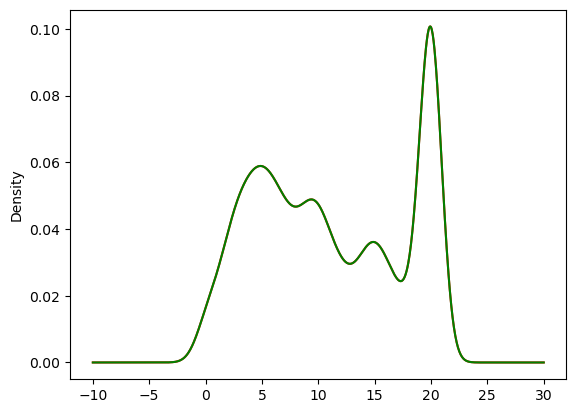

In [137]:
fig=plt.figure()
ax=fig.add_subplot(111)
temp.plot(kind='kde',color='red')
data[data['enrolled_university']=='no_enrollment']['experience'].plot(kind='kde',color='green')


<Axes: ylabel='Density'>

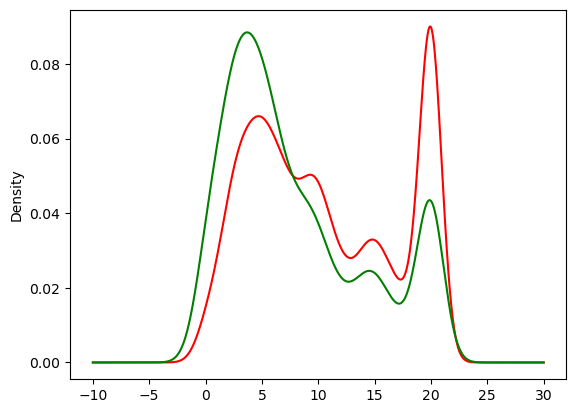

In [139]:
fig=plt.figure()
ax=fig.add_subplot(111)
data[data['gender']=='Male']['experience'].plot(kind='kde',color='red')
data[data['gender'].isnull()]['experience'].plot(kind='kde',color='green')

In [140]:
temp=data[data['gender']=='Male']['experience']

In [141]:
data['gender'].fillna('Male',inplace=True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_12716\2009112625.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['gender'].fillna('Male',inplace=True)


<Axes: ylabel='Density'>

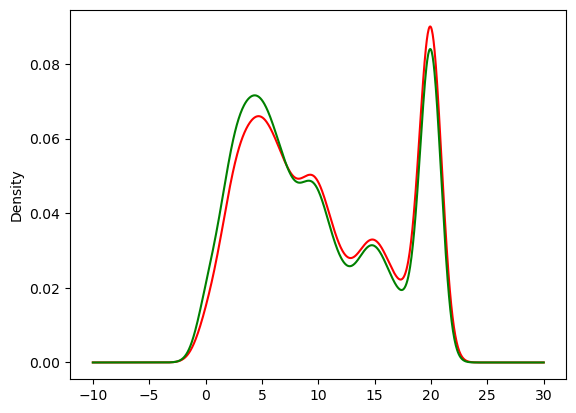

In [142]:
fig=plt.figure()
ax=fig.add_subplot(111)
temp.plot(kind='kde',color='red')
data[data['gender']=='Male']['experience'].plot(kind='kde',color='green')

In [109]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

In [110]:
x_train,x_test,y_train,y_test=train_test_split(data.drop('experience',axis=1),data['experience'],test_size=0.2)
x_train

,gender,enrolled_university,education_level,major_discipline
3390,NaN,Part time course,Graduate,STEM
5840,NaN,Part time course,High School,NaN
15166,Male,no_enrollment,Masters,STEM
11790,NaN,no_enrollment,Masters,STEM
16886,NaN,Full time course,Masters,STEM
...,...,...,...,...
11151,Male,Full time course,Graduate,STEM
4518,Male,no_enrollment,Graduate,STEM
13873,Male,no_enrollment,Masters,STEM
14254,Male,no_enrollment,Graduate,STEM


In [111]:
trf1=ColumnTransformer(transformers=[
    ('imputer1',SimpleImputer(strategy='most_frequent'),['enrolled_university','education_level','major_discipline']),
    ('imputer2',SimpleImputer(strategy='constant',fill_value='missing'),['gender'])
],remainder='passthrough')

In [112]:
trf1.fit(x_train)
x_trainn=trf1.transform(x_train)
x_testt=trf1.transform(x_test)
new_train=pd.DataFrame(x_trainn,columns=trf1.get_feature_names_out())
new_test = pd.DataFrame(x_testt, columns=trf1.get_feature_names_out())

In [113]:
new_train

,imputer1__enrolled_university,imputer1__education_level,imputer1__major_discipline,imputer2__gender
0,Part time course,Graduate,STEM,missing
1,Part time course,High School,STEM,missing
2,no_enrollment,Masters,STEM,Male
3,no_enrollment,Masters,STEM,missing
4,Full time course,Masters,STEM,missing
...,...,...,...,...
15321,Full time course,Graduate,STEM,Male
15322,no_enrollment,Graduate,STEM,Male
15323,no_enrollment,Masters,STEM,Male
15324,no_enrollment,Graduate,STEM,Male
